In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [8]:
from glmnet import ElasticNet

In [9]:
data= pd.read_csv('hitters.csv')

In [10]:
data = data.dropna()

data = pd.get_dummies(data)

X = data.drop(columns=['Salary'])
y = data['Salary']

In [11]:
X = X.values
y = y.values

np.random.seed(123)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=100,random_state=123)



In [12]:
lamda_grid = np.logspace(10,-2,100)

ridge_model = ElasticNet(alpha=0,lambda_path=lamda_grid)
ridge_model.fit(Xtrain,Ytrain)

ridge_coefs = ridge_model.coef_path_

lamda_50,lamda_60 = lamda_grid[50],lamda_grid[60]

coef_50 = ridge_coefs[:,50]
coef_60 = ridge_coefs[:,60]

l2_1 = np.sqrt(np.sum(coef_50**2))
l2_2 = np.sqrt(np.sum(coef_60**2))

print(f"L2 norm at lamda[50]{l2_1}")
print(f"L2 norm at lamda[60]{l2_2}")

L2 norm at lamda[50]15.164319038826157
L2 norm at lamda[60]69.57414020043211


In [ ]:
from sklearn.metrics import mean_squared_error

yhat_test_1 = ridge_model.predict(Xtest,lamda_50)
yhat_test_2 = ridge_model.predict(Xtest,lamda_60)

test_mse1 = mean_squared_error(Ytest,yhat_test_1)
test_mse2 = mean_squared_error(Ytest,yhat_test_2)

print(f"Test MSE for lambda[50] {test_mse1}")
print(f"Test MSE for lambda[60] {test_mse2}")

Test MSE for lambda[50] 135359.39558293435
Test MSE for lambda[50] 119176.90766282873


In [16]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=lamda_grid,store_cv_values=True)

ridge_cv.fit(Xtrain,Ytrain)


lamda_min = ridge_cv.alpha_

print("Optimal lamda from cross-validation: ",lamda_min)

Optimal lamda from cross-validation:  327454.9162877725


/home/datascience/Desktop/Prac_438/big-data/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [17]:
from sklearn.model_selection import cross_val_score

mse_score = -cross_val_score(ridge_model,Xtrain,Ytrain,cv =5,scoring='neg_mean_squared_error')


best_lambda_index = np.argmin(mse_score)
lambda_min = lamda_grid[best_lambda_index]
lamda_min

np.float64(327454.9162877725)

ValueError: x and y must have same first dimension, but have shapes (100,) and (5,)

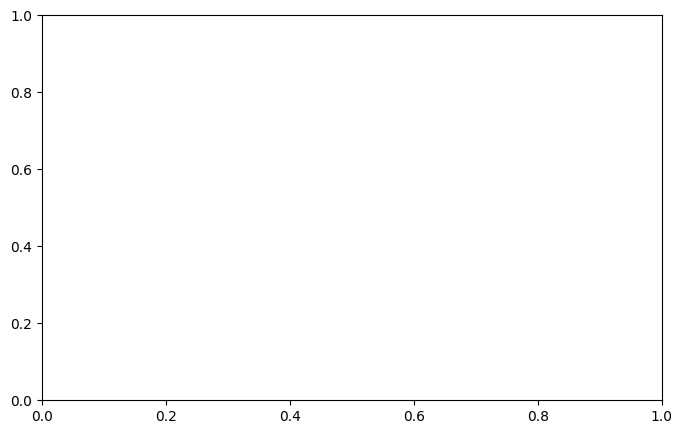

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(lamda_grid, mse_score, marker='o', linestyle='dashed', color='b', label="Cross-validation MSE")
plt.axvline(x=lambda_min, color='r', linestyle='--', label=f"Optimal Lambda: {lambda_min:.2f}")
plt.xscale('log')  # Use log scale for lambda
plt.xlabel("Lambda (log scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cross-Validation MSE vs. Lambda (Ridge Regression)")
plt.legend()
plt.show()

Optimal lambda from cross-validation: 187381.7423


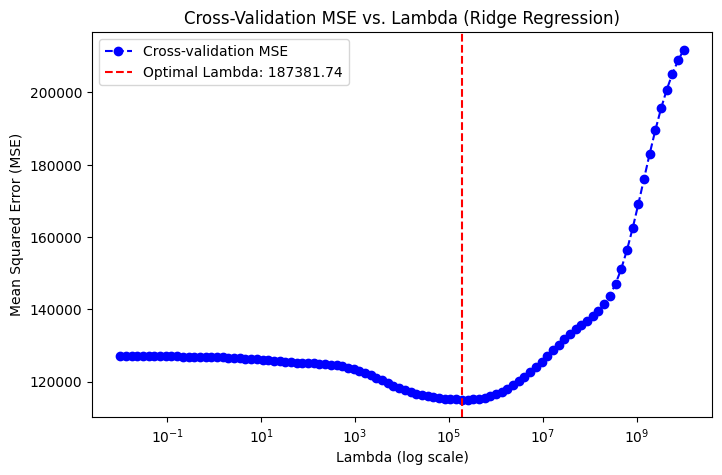

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define lambda values (log-spaced grid)
lambda_grid = np.logspace(10, -2, 100)

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Store MSE for each lambda
mse_scores = []

# Loop over each lambda
for lam in lambda_grid:
    fold_mse = []
    for train_index, val_index in kf.split(Xtrain):
        X_train_fold, X_val_fold = Xtrain[train_index], Xtrain[val_index]
        y_train_fold, y_val_fold = Ytrain[train_index], Ytrain[val_index]
        
        # Train Ridge model with current lambda
        ridge = Ridge(alpha=lam)
        ridge.fit(X_train_fold, y_train_fold)
        
        # Predict on validation set
        y_val_pred = ridge.predict(X_val_fold)
        
        # Compute MSE
        fold_mse.append(mean_squared_error(y_val_fold, y_val_pred))
    
    # Compute average MSE across folds for this lambda
    mse_scores.append(np.mean(fold_mse))

# Convert to NumPy array
mse_scores = np.array(mse_scores)

# Find the best lambda (with lowest MSE)
best_lambda_index = np.argmin(mse_scores)
lambda_min = lambda_grid[best_lambda_index]

print(f"Optimal lambda from cross-validation: {lambda_min:.4f}")

# Plot Cross-Validation MSE vs. Lambda
plt.figure(figsize=(8, 5))
plt.plot(lambda_grid, mse_scores, marker='o', linestyle='dashed', color='b', label="Cross-validation MSE")
plt.axvline(x=lambda_min, color='r', linestyle='--', label=f"Optimal Lambda: {lambda_min:.2f}")
plt.xscale('log')  # Use log scale for lambda
plt.xlabel("Lambda (log scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cross-Validation MSE vs. Lambda (Ridge Regression)")
plt.legend()
plt.show()
